In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("/content/global_co2.csv")
df.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   Cement       260 non-null    int64  
 6   Gas Flaring  260 non-null    int64  
 7   Per Capita   61 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 16.4 KB


In [5]:
from sklearn.model_selection import train_test_split
X=df[['Year']]
Y=df[['Total']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

#####DTR

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
pred = dtr.predict(X_test)
r2_score(Y_test, pred)

0.9976759757546184

In [7]:
print(dtr.predict([[2016]]))
print(dtr.predict([[2017]]))

[9167.]
[9167.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


####SVR

In [8]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
model.score(X_test,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.011316703632661351

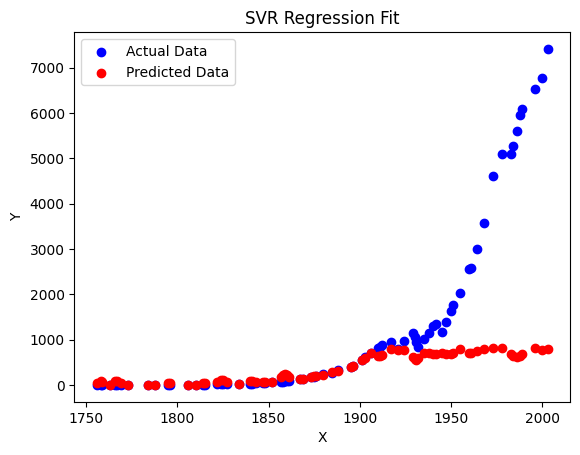

In [9]:
plt.scatter(X_test,Y_test,color='blue',label='Actual Data')
plt.scatter(X_test,y_pred,color='red',label='Predicted Data')
plt.title('SVR Regression Fit')
plt.xlabel("X")
plt.ylabel('Y')
plt.legend()
plt.show()

####Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X_train,Y_train)

y_predict=model.predict(X_test)
model.score(X_test,Y_test)

0.5482383580744317

In [15]:
print(model.predict([[2016]]))
print(model.predict([[2017]]))

[[4851.90444574]]
[[4876.56893381]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


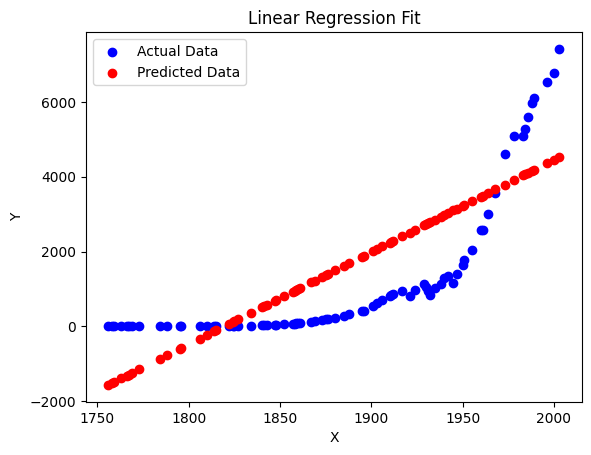

In [16]:
plt.scatter(X_test,Y_test,color='blue',label='Actual Data')
plt.scatter(X_test,y_predict,color='red',label='Predicted Data')
plt.title('Linear Regression Fit')
plt.xlabel("X")
plt.ylabel('Y')
plt.legend()
plt.show()